In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# The Telco Customer Churn dataset is already available in the './datasets/' folder.
# To download it directly from Kaggle, uncomment the following lines:
# import kaggle
# kaggle.api.authenticate()
# kaggle.api.dataset_download_files('blastchar/telco-customer-churn', path='./datasets/', unzip=True)


In [3]:
df = pd.read_csv('./datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **Findings**

* The dataset has **3 numeric fields**: `tenure`, `MonthlyCharges`, and `TotalCharges`.
* All other columns are **categorical**.
* **TotalCharges** should be numeric but it appears as a string in the dataset.


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#### Most of the columns are **binary (2 values)** or **trinary (3 values)**, and a few are **numeric**, such as `tenure`, `MonthlyCharges`, and `TotalCharges`.

In [8]:
df.duplicated().sum()

np.int64(0)

#### No Duplicate values

In [9]:
df.isna().sum().sum()

np.int64(0)

In [10]:
# Checking for blank count
blank_counts = df.isin([' ', '']).sum()
blank_counts

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### **Missing Values**

* The dataset has **no null values**.
* There are **11 blank entries** in **one column**, but all other rows and columns contain data.


In [11]:
# Removing any leading or trailing spaces and lowering in the column names
df.columns = df.columns.str.strip().str.lower()

In [12]:
# Removing 'customerid' as it is not useful for analysis
df.drop('customerid', axis=1, inplace=True)

#### Handling the issue of totalcharges showing as object because of blank values

In [13]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
# Converting the data column

In [14]:
df['totalcharges'].isna().sum()

np.int64(11)

In [15]:
# Replacing the null fields with the mean
df['totalcharges'] = df['totalcharges'].fillna(df['totalcharges'].mean())

# Analysis of the dataset
- Univariate Analysis

In [16]:
# Converting 'seniorcitizen' from binary (0/1) to categorical ('Yes'/'No') for analysis
df['seniorcitizen'] = df['seniorcitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')
# Selecting the categorical values
df_cat = df.select_dtypes(exclude='number')
df_cat.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'churn'],
      dtype='object')

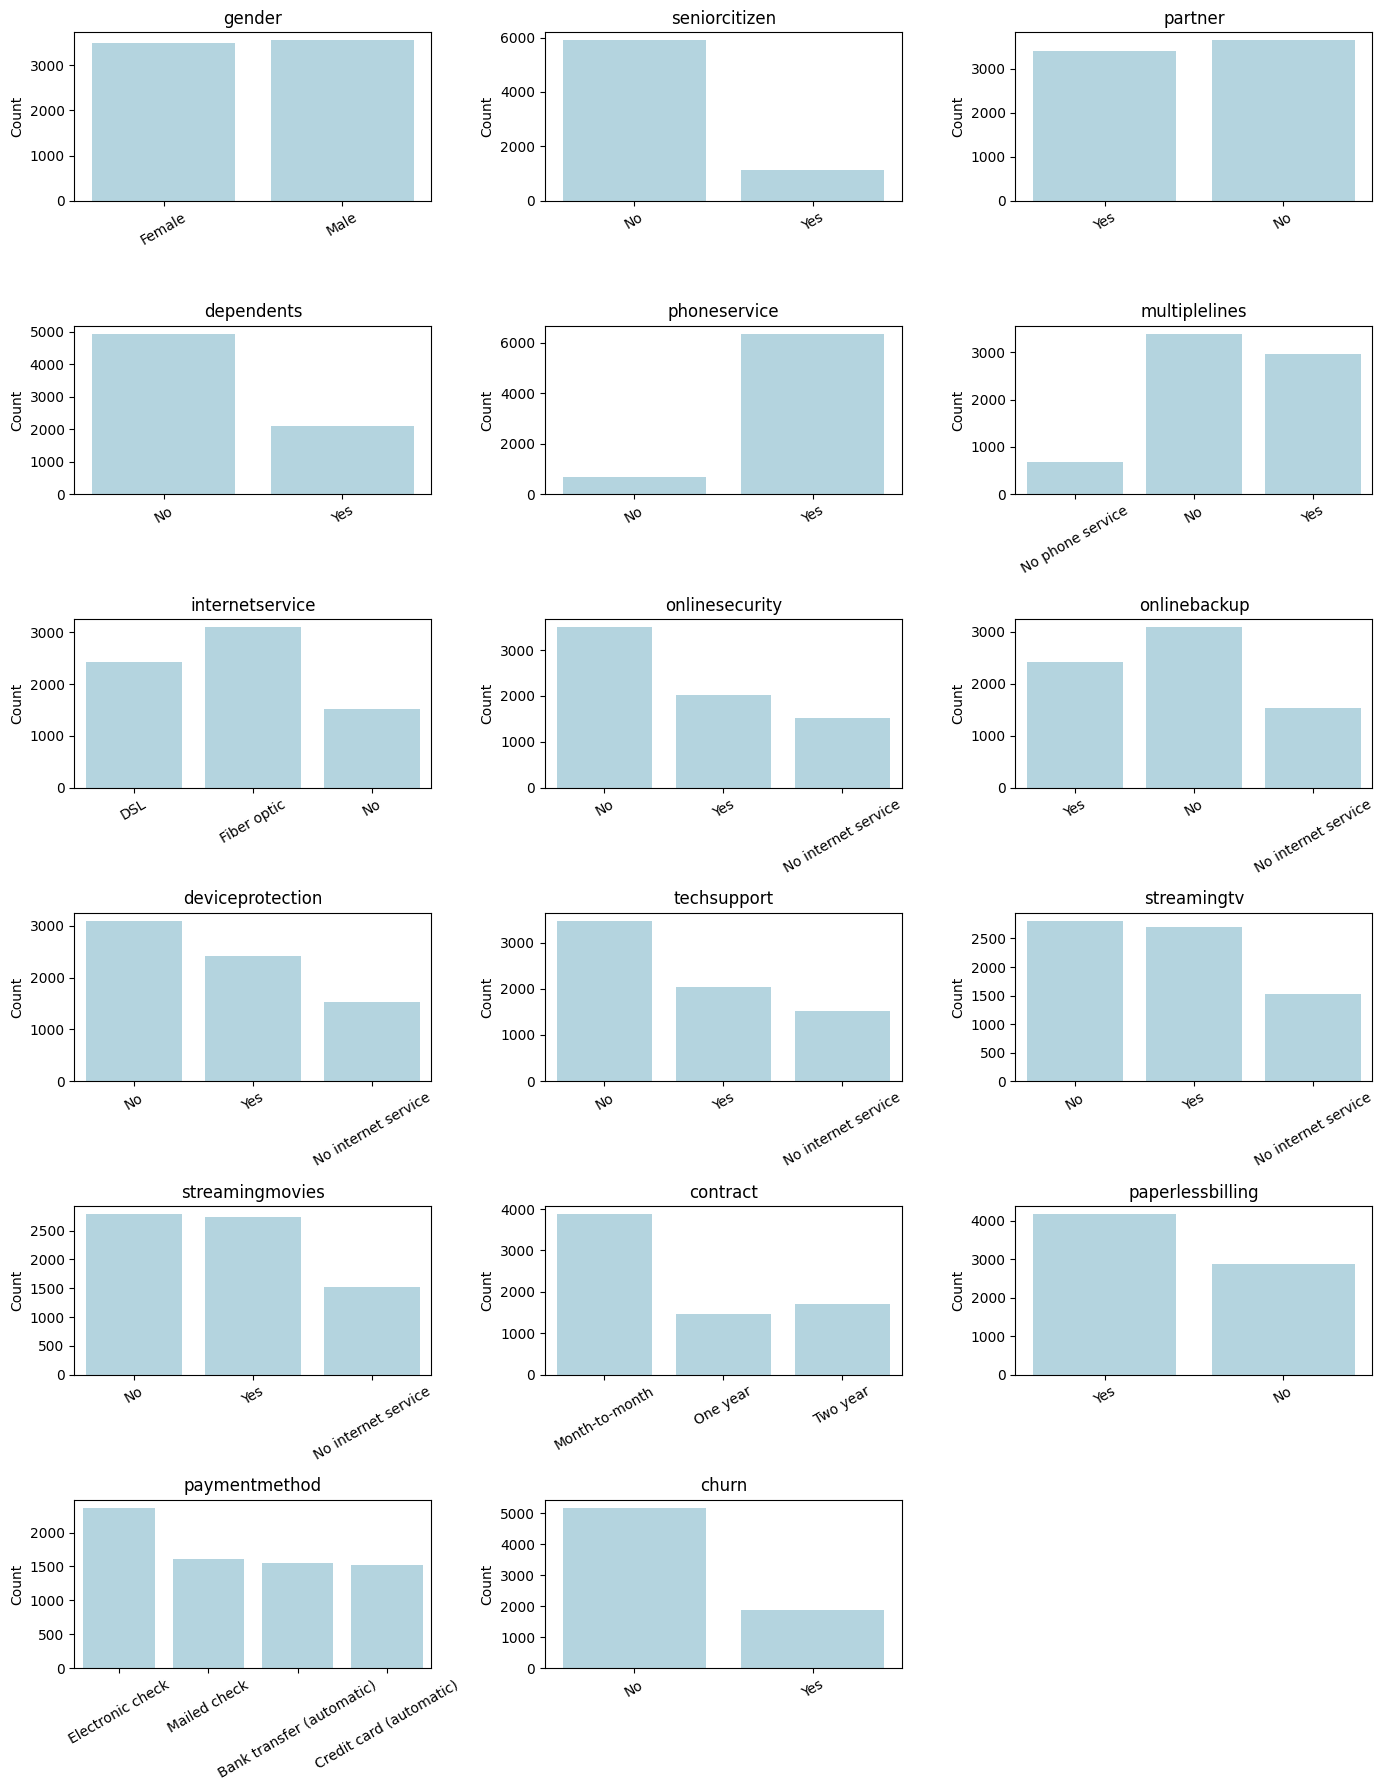

In [17]:
total = len(df_cat.columns)
cols = 3
rows = int(np.ceil(total / cols))

fig, axes = plt.subplots(rows, cols, figsize=(14, 3*rows))
axes = axes.flatten()

for i, col in enumerate(df_cat.columns):
    sns.countplot(data=df_cat, x=col, ax=axes[i],color='lightblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=30)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### Customer Data Insights from Visualization

- **Gender Distribution:** The customer base is almost evenly split between male and female.

- **Partner Status:** Slightly more customers do not have partners compared to those who do.

- **Dependents:** A majority of customers do not have dependents.

- **Phone Service:** Most customers subscribe to phone service; only a small portion do not.

- **Multiple Lines:** Among customers with phone service, many have multiple lines, while some have only a single line or no phone service at all.

- **Internet Service Type:** Fiber optic is the most popular internet service, followed by DSL. A noticeable number of customers do not have internet service.

- **Additional Services (Online Security, Backup, Device Protection, Tech Support, Streaming TV/Movies):**  
  Many customers do not subscribe to these add-on services. Those without internet service naturally do not have these options.

- **Contract Type:** Month-to-month contracts dominate the customer base, while longer-term contracts (one year or two years) are less common.

- **Paperless Billing:** More customers prefer paperless billing over traditional billing methods.

- **Payment Methods:** Electronic check is the most common payment method, with mailed checks, bank transfers, and credit card payments also fairly represented.

- **Customer Churn:** The majority of customers remain active, but a significant minority have churned (Class Imbalance).


In [18]:
# Selecting the numberic values
df_no = df.select_dtypes(include = 'number')
df_no.columns

Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')

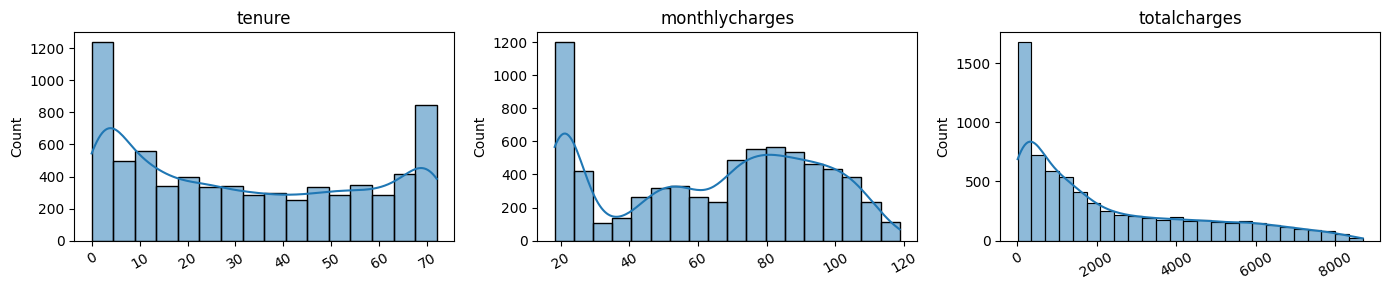

In [19]:
total = len(df_no.columns)
cols = 3
rows = int(np.ceil(total / cols))

fig, axes = plt.subplots(rows, cols, figsize=(14, 3*rows))
axes = axes.flatten()

for i, col in enumerate(df_no.columns):
    sns.histplot(data=df_no, x=col, ax=axes[i],kde=True)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=30)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### Tenure
- Most customers have low tenure (new customers).
- There is a peak at the maximum tenure (~72 months), showing many loyal long-term customers.
- Fewer customers have medium tenure.

### Monthly Charges
- Monthly charges show two peaks: one at low charges (~20-30), another around 70-90.
- Indicates different customer groups with varying service usage.

### Total Charges
- Distribution is heavily skewed to the right.
- Many customers have low total charges (new customers).
- A few customers have very high total charges (long-term customers).